In [11]:
from skimage.io import imread
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = imread('Peppers.jpg')

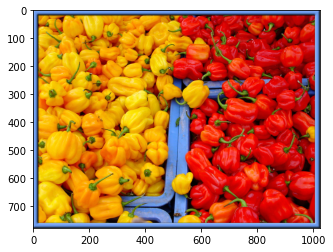

In [3]:
plt.imshow(img)
plt.show()

In [6]:
img_swap = img.copy()

height, width, channels = img.shape

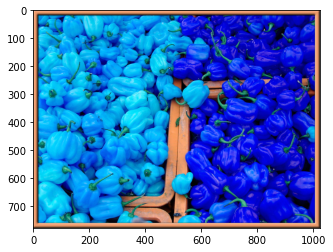

In [8]:
#Swapping Red and Blue Channels

for y in range(height):
  for x in range(width):
    img_swap[y,x, 0] = img[y, x, 2] #Swap red and blue    
    img_swap[y, x, 2] = img[y, x, 0]   #Swap red and blue
    img_swap[y, x, 1] = img[y, x, 1]  #G

plt.imshow(img_swap)
plt.show()

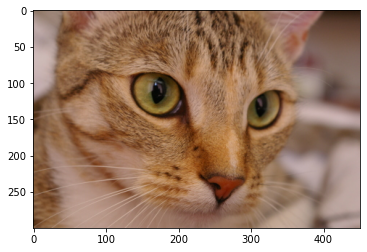

In [9]:
cat = data.chelsea()
cat_vign = cat.copy()

plt.imshow(cat)
plt.show()

(150.0, 225)


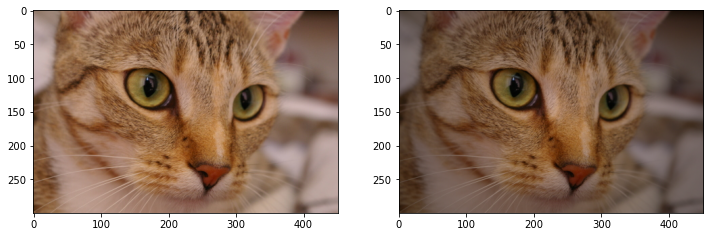

In [12]:
#Adding a circular Vignette to an image which gets weaker exponentially with increasing distance

import math
[height, width, channels] = cat_vign.shape
center = height/2 , width//2
print(center)
cat_vign_t = cat_vign.copy()
def vig(width, r):
  return np.exp(-r/width)

for y in range(height):
  for x in range(width):

      p = np.array([y, x])
      r = np.linalg.norm(center-p)
      f = (vig(width, r))
      cat_vign_t[y,x,:] = cat_vign[y, x, :] * f



fig, ax = plt.subplots(1, 2, figsize=(12, 18))
plt.subplot(1, 2, 1)
plt.imshow(cat)
plt.subplot(1, 2, 2)
plt.imshow(cat_vign_t)
plt.show()

In [13]:
# Looking at contrast stretching, gamma correction and histogram equalisation of cat image

In [19]:
from skimage.color import rgb2gray
from skimage import data, exposure
from skimage import img_as_float
cat_contrast = cat.copy()
grayscale = rgb2gray(cat_contrast)
# Contrast stretching
p2, p98 = np.percentile(grayscale, (5, 95))
img_contrast_stretch = exposure.rescale_intensity(grayscale, in_range=(p2, p98))

# Gamma correction
gamma = 0.5
img_gamma = exposure.adjust_gamma(grayscale, gamma)

# Histogram equalisation
img_hist_eq = exposure.equalize_hist(grayscale)

In [20]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram.
    """
    image = img_as_float(image)
    ax_img, ax_hist = axes

    # Display image
    ax_img.imshow(image, cmap='gray')
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    return ax_img, ax_hist

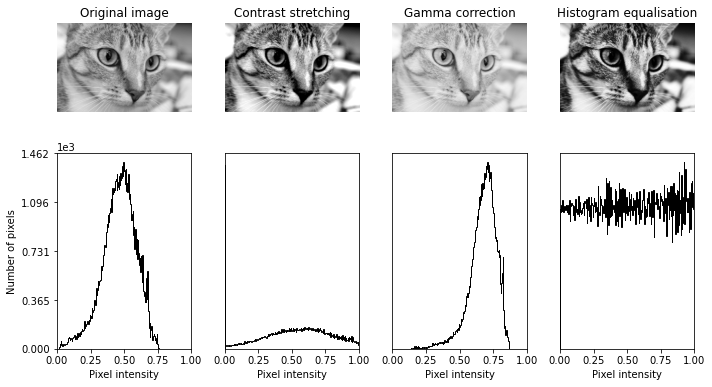

In [21]:
fig = plt.figure(figsize=(10, 6))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = plt.subplot(2, 4, 1)
axes[0, 1] = plt.subplot(2, 4, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 4, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 3] = plt.subplot(2, 4, 4, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 4, 5)
axes[1, 1] = plt.subplot(2, 4, 6)
axes[1, 2] = plt.subplot(2, 4, 7)
axes[1, 3] = plt.subplot(2, 4, 8)

ax_img, ax_hist = plot_img_and_hist(grayscale, axes[:, 0])
ax_img.set_title('Original image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist = plot_img_and_hist(img_contrast_stretch, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist = plot_img_and_hist(img_gamma, axes[:, 2])
ax_img.set_title('Gamma correction')

ax_img, ax_hist = plot_img_and_hist(img_hist_eq, axes[:, 3])
ax_img.set_title('Histogram equalisation')

fig.tight_layout()     # prevent overlap of y-axis labels
plt.show()